<a href="https://colab.research.google.com/github/Md-Aziz-Developer/tensorflow-learning/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable bases on some other combination of variables, even shorter... predictiing a number.


In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.1


## Creating data to view and fit

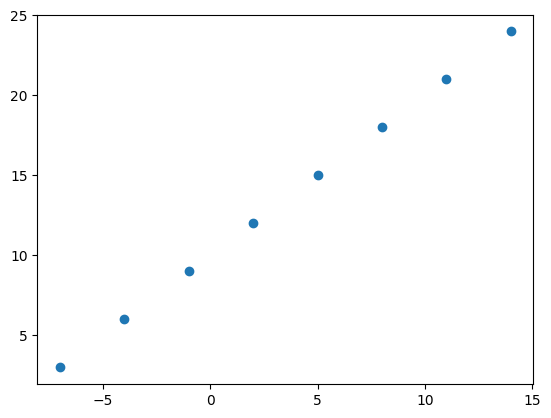

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X=np.array([-7.0, -4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y);

In [3]:
y==X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shape

In [4]:
# Create a demo tensor for our housing price prediction problem
housing_info=tf.constant(['bedroom','bathroom','garage'])
housing_price=tf.constant([939700])
housing_info, housing_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0],y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape=X.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
X[0].shape, y[0].shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0], y[0]

(-7.0, 3.0)

In [11]:
# Turn our NUmPy arrays into tensors
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

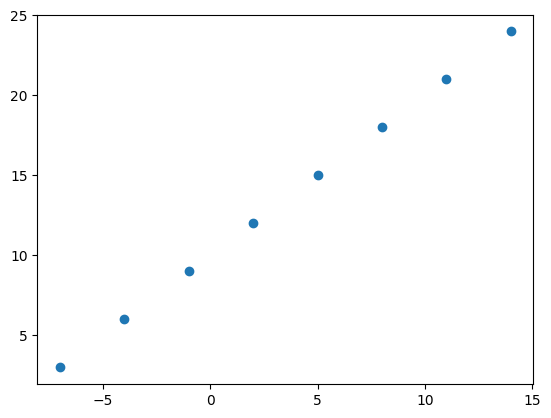

In [13]:
plt.scatter(X,y)

## Steps in modeling with tensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in pther words, the function which tells our model how erong it is) and the optimizer (tell our model how to improve the patterns its learning) an evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short form of stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step - loss: 19.5490 - mae: 19.5490
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 19.2677 - mae: 19.2677
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 18.9865 - mae: 18.9865
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 18.7052 - mae: 18.7052
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 18.4240 - mae: 18.4240
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 18.1427 - mae: 18.1427
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 17.8615 - mae: 17.8615
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 17.5802 - mae: 17.5802
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 17.2990 - mae: 17.2990
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 17.0177 - mae: 17.0177
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 16.7365 - mae: 16.7365
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 16.4552 - mae: 16.4552
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━

In [15]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try and make a prediction using our model
y_preds=model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [17]:
y_preds

array([[-4.9006963]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of  the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it traning for longer) or on more data (give the model example to learn from).

In [23]:
# Let's rebuild our model

# 1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step - loss: 15.2658 - mae: 15.2658
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 14.9859 - mae: 14.9859
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 14.8534 - mae: 14.8534
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 14.7209 - mae: 14.7209
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 14.5884 - mae: 14.5884
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 14.4559 - mae: 14.4559
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 14.3234 - mae: 14.3234
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 14.1909 - mae: 14.1909
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 14.0584 - mae: 14.0584
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13.9259 - mae: 13.9259
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 13.7934 - mae: 13.7934
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.6609 - mae: 13.6609
Epoch 13/100
1/1 ━━━━━━━

In [24]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [25]:
# Let's see if our model's prediction has improved
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[29.346188]], dtype=float32)

In [26]:
# Let's rebuild our model again (this time we added an extra hidden layer with 100 hidden units)

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step - loss: 13.4737 - mae: 13.4737
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 13.0003 - mae: 13.0003
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.5422 - mae: 12.5422
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12.0866 - mae: 12.0866
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.6229 - mae: 11.6229
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.1469 - mae: 11.1469
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.6507 - mae: 10.6507
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.1354 - mae: 10.1354
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 9.5936 - mae: 9.5936
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.0258 - mae: 9.0258
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.4225 - mae: 8.4225
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.7791 - mae: 7.7791
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [27]:
# Let's see if our model's prediction has improved after adding hidden layer
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[32.698563]], dtype=float32)

In [28]:
# Let's rebuild our model again

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None), # Decrease the hidden layer unit to 50 and activation to default
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step - loss: 13.4786 - mae: 13.4786
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.9701 - mae: 12.9701
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 12.4603 - mae: 12.4603
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.9463 - mae: 11.9463
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.4256 - mae: 11.4256
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 10.8955 - mae: 10.8955
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 10.3532 - mae: 10.3532
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 9.7960 - mae: 9.7960
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 9.2210 - mae: 9.2210
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.6252 - mae: 8.6252
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 8.0056 - mae: 8.0056
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.3591 - mae: 7.3591
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [29]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[29.868168]], dtype=float32)

In [30]:
# Let's rebuild our model again

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(), # change the optimizer to Adam
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.5565 - mae: 13.5565
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13.4981 - mae: 13.4981
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.4397 - mae: 13.4397
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.3813 - mae: 13.3813
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 13.3229 - mae: 13.3229
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 13.2644 - mae: 13.2644
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.2059 - mae: 13.2059
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.1474 - mae: 13.1474
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13.0888 - mae: 13.0888
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.0302 - mae: 13.0302
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.9714 - mae: 12.9714
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.9126 - mae: 12.9126
Epoch 13/100
1/1 ━━━━━━━━━━

In [31]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[30.303495]], dtype=float32)

In [33]:
# Let's rebuild our model again

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # Add learning rate to 0.01
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step - loss: 14.1208 - mae: 14.1208
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13.4062 - mae: 13.4062
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.6900 - mae: 12.6900
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.9706 - mae: 11.9706
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.2469 - mae: 11.2469
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.5171 - mae: 10.5171
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 9.7793 - mae: 9.7793
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 9.0312 - mae: 9.0312
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 8.2700 - mae: 8.2700
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.4933 - mae: 7.4933
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.6985 - mae: 6.6985
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.6407 - mae: 6.6407
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [34]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[27.687607]], dtype=float32)

In [35]:
model.predict(np.array([21.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[31.855846]], dtype=float32)